# Evaluación de asteroides

### Actividad
La NASA mantiene la información de varios cometas y después de un exhaustivo análisis ha determinado cuál de ellos es peligroso en caso de que choque a la tierra (variable Danger). Específicamente, han analizado en forma manual una muestra de 100.000 asteroides. Los datos consisten en 27 variables, con distinta información como por ejemplo nombre del asteroide, su periodo orbital, su periodo de rotación, etc.

Todos los datos existentes, se encuentran en un puro archivo llamado tarea2Data.csv. Mientras que las descripciones de cada una de las variables se encuentran en el archivo tarea2Informacion.txt

Desafortunadamente, la NASA todavía no ha evaluado 37.681 asteroides y no tienen tiempo para realizarlo. Por lo mismo, le piden que aplique modelos de Machine learning para obtener una evaluación de estos asteroides.

In [32]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import random
from sklearn import metrics as mt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from plotnine import *
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Seed
random.seed(1111)
np.random.seed(1111)

In [3]:
# Dataframe visualization settings
pd.set_option("display.max_columns", None)
pd.reset_option("display.max_rows")

#### 1. Leer los datos y borrar las variables/asteroides que sean necesarias. En caso que crea que la base de datos todavía es demasiado grande para aplicar los modelos, es posible tomar una muestra de la misma.

In [4]:
# Read data
df_DataOrig = pd.read_csv("tarea2Data.csv")
df_DataOrig

,full_name,a,e,G,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid,Danger
0,(1162 T-1),3.069911,0.096918,NaN,10.633999,344.778698,248.285216,2.772381,3.367440,5.378941,17571.0,0,902,14.0,NaN,0.243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.78504,True
1,(2000 WV173),3.126769,0.101765,NaN,14.228075,93.358911,74.972094,2.808575,3.444963,5.529068,6793.0,0,1128,13.6,NaN,0.061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.85923,True
2,(2010 PE41),3.240195,0.114902,NaN,13.278967,230.808838,255.060949,2.867890,3.612501,5.832637,5367.0,0,246,15.4,NaN,0.028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.92025,True
3,(1999 TF222),3.118650,0.062830,NaN,8.379401,225.435675,212.341581,2.922706,3.314594,5.507545,8046.0,0,978,14.1,NaN,0.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.94124,True
4,(2003 WG74),3.032740,0.104018,NaN,3.158993,315.183440,183.530613,2.717281,3.348198,5.281544,21144.0,0,373,15.5,NaN,0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.73110,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,(2003 BH74),2.670063,0.134364,NaN,16.550615,103.041992,353.103112,2.311303,3.028823,4.363052,6175.0,0,442,15.7,NaN,0.109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.32895,True
99996,(2000 EV30),3.003917,0.097908,NaN,10.039414,49.125131,302.969306,2.709811,3.298024,5.206431,13231.0,0,1751,13.4,NaN,0.256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.72091,True
99997,(2007 TG69),3.054121,0.045967,NaN,1.787741,222.936419,150.882122,2.913732,3.194511,5.337497,6347.0,0,138,16.5,NaN,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.91316,True
99998,(2008 DP26),3.157728,0.186746,NaN,25.300444,178.902788,97.637852,2.568034,3.747421,5.611387,9350.0,0,146,15.6,NaN,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.69556,True


In [7]:
# Describe data
df_DataOrig.info()
print()
print(df_DataOrig.describe(include="all"))
print()
print(df_DataOrig.head())
print()
print(df_DataOrig.tail())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       100000 non-null  object 
 1   a               100000 non-null  float64
 2   e               100000 non-null  float64
 3   G               83 non-null      float64
 4   i               100000 non-null  float64
 5   om              100000 non-null  float64
 6   w               100000 non-null  float64
 7   q               100000 non-null  float64
 8   ad              100000 non-null  float64
 9   per_y           100000 non-null  float64
 10  data_arc        99902 non-null   float64
 11  condition_code  100000 non-null  int64  
 12  n_obs_used      100000 non-null  int64  
 13  H               99450 non-null   float64
 14  extent          11 non-null      object 
 15  albedo          99106 non-null   float64
 16  rot_per         8102 non-null    float64
 17  GM         

De la descripcion de datos se observa claramente que variables "G", "extent", "GM", "IR", "rot_per", "BV", "UB",
"spec_B", "spec_T" tienen una cantidad de valores nulos importantes con respecto al total de registros. Por lo tanto
se dejan fuera de la data a considerar dentro del proceso de clasificación.

De igual forma se elimina "full_name", por no contar con caracteristicas que aporten a los modelos de clasificación.

Finalmente se eliminan datos categoricos "pha" (99.8% valores iguales), "neo" (99.4% valores iguales), y numérico
"condition_code" (valores mayoritariamente "0" no inciden en distribuciones de otras variables)

In [8]:
# Remove innecesary columns
df_DataOrig_Sel = df_DataOrig.drop(["full_name", "G", "extent", "GM", "IR", "rot_per", "BV", "UB", "spec_B", "spec_T", "pha", "neo", "condition_code"], axis="columns", inplace=False)

In [9]:
# Remove n/a
df_DataOrig_Sel = df_DataOrig_Sel.dropna()

df_DataOrig_Sel.isna().sum()

a             0
e             0
i             0
om            0
w             0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
H             0
albedo        0
moid          0
Danger        0
dtype: int64

In [10]:
# Describe selected data and remove NaN
df_DataOrig_Sel.info()
print()
print(df_DataOrig_Sel.describe(include="all"))
print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98815 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a           98815 non-null  float64
 1   e           98815 non-null  float64
 2   i           98815 non-null  float64
 3   om          98815 non-null  float64
 4   w           98815 non-null  float64
 5   q           98815 non-null  float64
 6   ad          98815 non-null  float64
 7   per_y       98815 non-null  float64
 8   data_arc    98815 non-null  float64
 9   n_obs_used  98815 non-null  int64  
 10  H           98815 non-null  float64
 11  albedo      98815 non-null  float64
 12  moid        98815 non-null  float64
 13  Danger      98815 non-null  bool   
dtypes: bool(1), float64(12), int64(1)
memory usage: 10.6 MB

                   a             e             i            om             w  \
count   98815.000000  98815.000000  98815.000000  98815.000000  98815.000000   
unique       

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'om'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'q'}>,
        <AxesSubplot:title={'center':'ad'}>,
        <AxesSubplot:title={'center':'per_y'}>],
       [<AxesSubplot:title={'center':'data_arc'}>,
        <AxesSubplot:title={'center':'n_obs_used'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'albedo'}>],
       [<AxesSubplot:title={'center':'moid'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

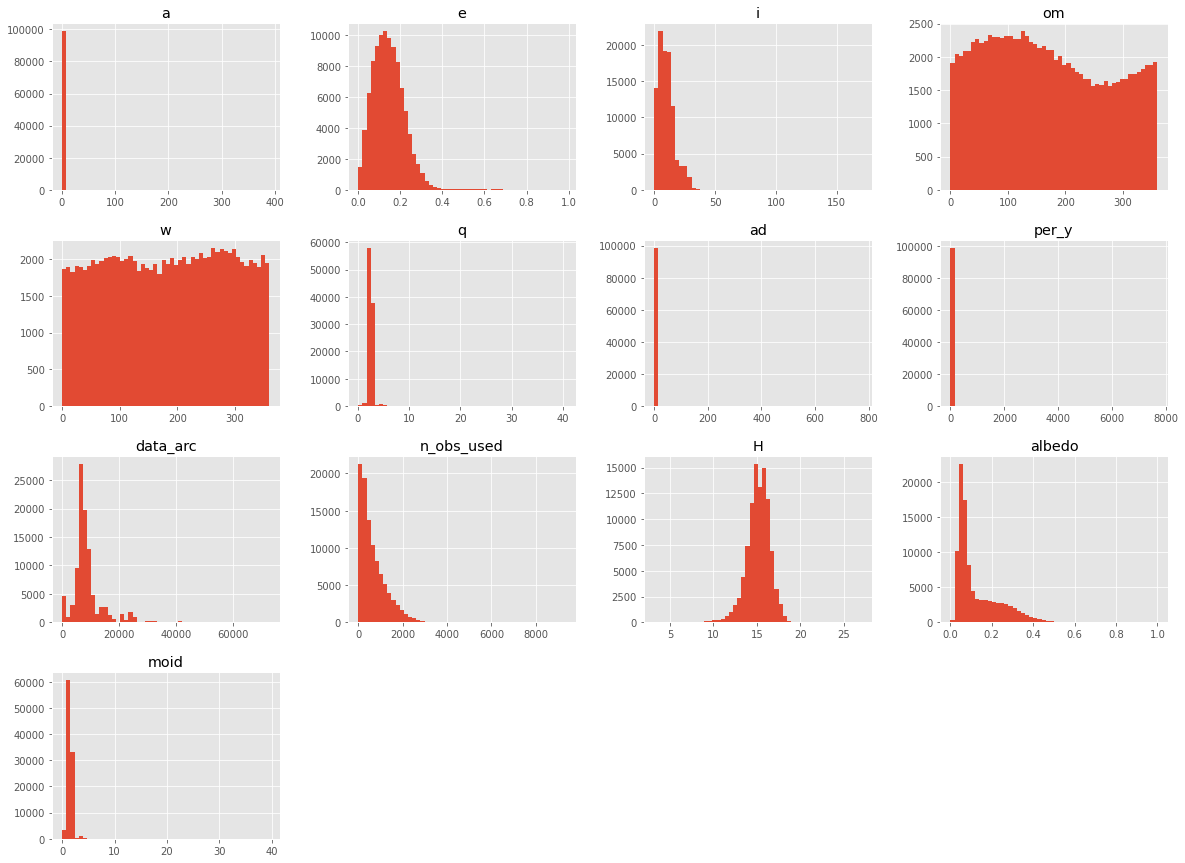

In [11]:
# Create hist to see numeric data
df_DataOrig_Sel.hist(bins=50,figsize=(20,15))

De la visualización de histogramas se podria depurar aún mas la base de variables en cuanto a "a", "ad", "per_y",
eliminando los registros con valores más allá que el 75% de su distribución, ya que claramente existe presencia de
valores atípicos en sus distribuciones.

In [12]:
# Keep values less or equal 5
df_DataOrig_Sel2 = df_DataOrig_Sel[df_DataOrig_Sel["a"] < 5 ]
df_DataOrig_Sel2 = df_DataOrig_Sel2[df_DataOrig_Sel2["ad"] < 5 ]

# "per_y" is tight
df_DataOrig_Sel2.isna().sum()

a             0
e             0
i             0
om            0
w             0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
H             0
albedo        0
moid          0
Danger        0
dtype: int64

In [88]:
# Reset index
df_DataOrig_Sel2 = df_DataOrig_Sel2.reset_index(drop=True)

In [13]:
# See size of dataset 
df_DataOrig_Sel2.shape

(97238, 14)

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'om'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'q'}>,
        <AxesSubplot:title={'center':'ad'}>,
        <AxesSubplot:title={'center':'per_y'}>],
       [<AxesSubplot:title={'center':'data_arc'}>,
        <AxesSubplot:title={'center':'n_obs_used'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'albedo'}>],
       [<AxesSubplot:title={'center':'moid'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

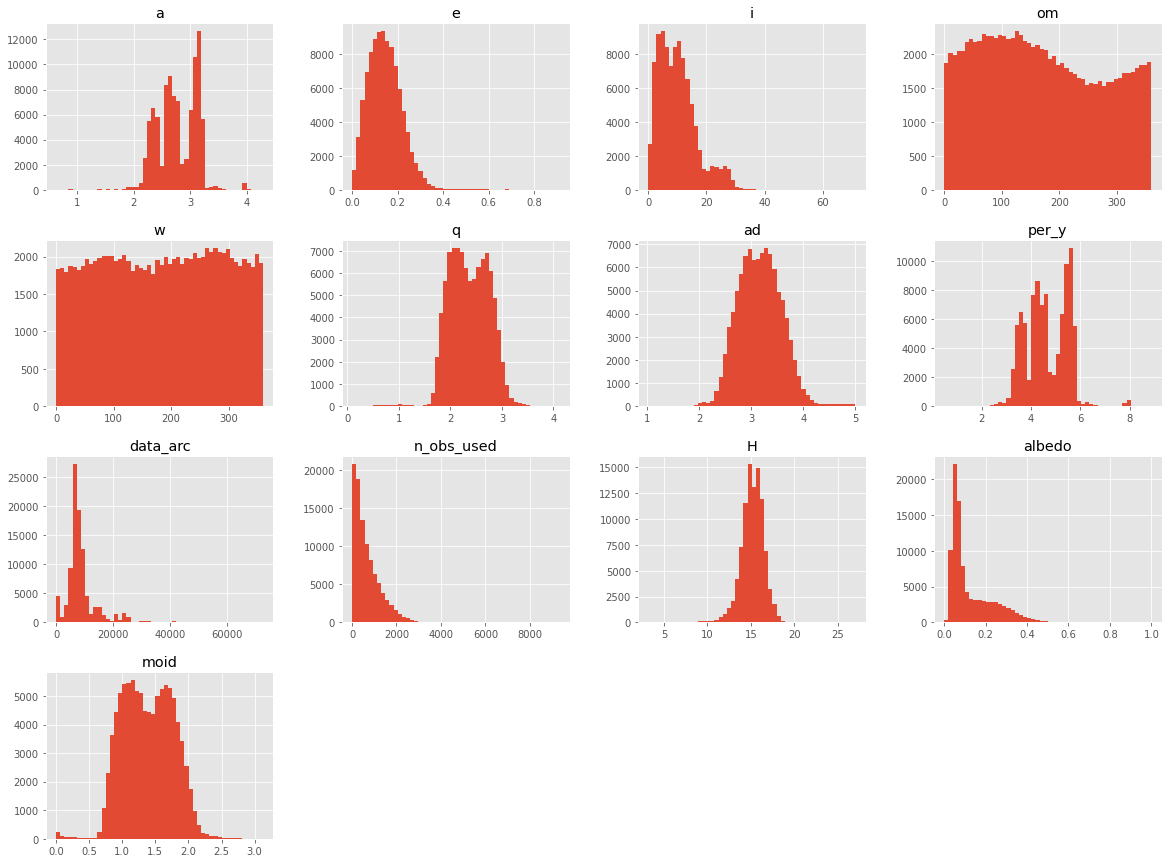

In [14]:
# Final hist to see final numeric data selected
df_DataOrig_Sel2.hist(bins=50,figsize=(20,15))

## Decision Tree

Apply a decision tree model to predict if asteroid is dangerous or not

In [15]:
# Define predictive and response variable
X = df_DataOrig_Sel2.iloc[:,:-1]
y = df_DataOrig_Sel2.iloc[:,-1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
# Se Decision Tree model
tree = DecisionTreeClassifier()

In [18]:
# Build k-fold for cross validation
k = 10
kf = KFold(n_splits=k)

In [19]:
# Errors
trainError = np.zeros(k)
testError = np.zeros(k)

In [22]:
# Train tree to max depth
i=0
for train_index, test_index in kf.split(df_DataOrig_Sel2):
    tree = tree.fit(df_DataOrig_Sel2.iloc[train_index,:-1],df_DataOrig_Sel2.iloc[train_index,-1])
    prediccion = tree.predict(df_DataOrig_Sel2.iloc[train_index,:-1])
    trainError[i] = mt.f1_score(df_DataOrig_Sel2.iloc[train_index,-1],prediccion,pos_label=1)
    prediccion = tree.predict(df_DataOrig_Sel2.iloc[test_index,:-1])
    testError[i] = mt.f1_score(df_DataOrig_Sel2.iloc[test_index,-1],prediccion,pos_label=1)
    i+=1

print("F1-score del modelo para training: ",trainError.mean(),"+-",trainError.std())
print("F1-score del modelo para test: ",testError.mean(),"+-",testError.std())
print("Profundidad: ",tree.get_depth())
print("Número de hojas: ",tree.get_n_leaves())

F1-score del modelo para training:  1.0 +- 0.0
F1-score del modelo para test:  0.9802055233570377 +- 0.0009145528875974017
Profundidad:  25
Número de hojas:  1865


In [23]:
depth = tree.get_depth()
result = pd.DataFrame(np.zeros((depth,5)),columns=["meanTrain","stdTrain","meanTest","stdTest","maxDepth"])
for i in range(depth):
    finalModel_2 = DecisionTreeClassifier(max_depth=i+1)
    trainError = np.zeros(k)
    testError = np.zeros(k)
    index = 0
    for train_index, test_index in kf.split(df_DataOrig_Sel2):
        finalModel_2 = finalModel_2.fit(df_DataOrig_Sel2.iloc[train_index,:-1],df_DataOrig_Sel2.iloc[train_index,-1])
        prediccion = finalModel_2.predict(df_DataOrig_Sel2.iloc[train_index,:-1])
        trainError[index] = mt.f1_score(df_DataOrig_Sel2.iloc[train_index,-1],prediccion,pos_label=1)
        prediccion = finalModel_2.predict(df_DataOrig_Sel2.iloc[test_index,:-1])
        testError[index] = mt.f1_score(df_DataOrig_Sel2.iloc[test_index,-1],prediccion,pos_label=1)
        index += 1
    result.iloc[i,0] = trainError.mean()
    result.iloc[i,1] = trainError.std()
    result.iloc[i,2] = testError.mean()
    result.iloc[i,3] = testError.std()    
    result.iloc[i,4] = i+1
result

,meanTrain,stdTrain,meanTest,stdTest,maxDepth
0,0.954606,0.000180,0.954602,0.001616,1.0
1,0.959085,0.000582,0.958770,0.001530,2.0
2,0.960061,0.001367,0.959782,0.002475,3.0
3,0.976509,0.001605,0.976146,0.002642,4.0
4,0.978796,0.000406,0.978293,0.001118,5.0
5,0.984082,0.000190,0.983204,0.001011,6.0
6,0.986100,0.000264,0.984652,0.000743,7.0
7,0.987677,0.000187,0.984971,0.001154,8.0
8,0.989246,0.000175,0.984797,0.001167,9.0
9,0.990984,0.000183,0.984142,0.001297,10.0


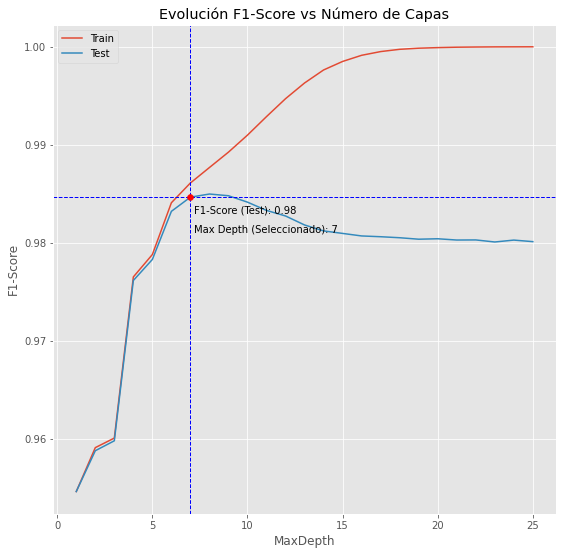

In [25]:
# Plot depth
fg100, ax100 = plt.subplots(figsize=(9,9))
plt.plot(result.maxDepth, result.meanTrain)
plt.plot(result.maxDepth, result.meanTest)
ax100.set_title("Evolución F1-Score vs Número de Capas")
ax100.set_xlabel("MaxDepth")
ax100.set_ylabel("F1-Score")
ax100.legend(["Train", "Test"])
ax100.axvline(x=7, linewidth=1, linestyle="--", color="b")
ax100.axhline(y=result.meanTest[6], linewidth=1, linestyle="--", color="b")
ax100.scatter(x=7, y=result.meanTest[6], color="r", zorder=100)
ax100.annotate("F1-Score (Test): %.2f" %result.meanTest[6], xy=(7.2,0.983), ha="left")
ax100.annotate("Max Depth (Seleccionado): %.0f" %7, xy=(7.2,0.981), ha="left")
plt.show()

El sobreentrenamiento en maxDepth empieza por encima de 6. Por eso se demuestra que la profundidad máxima debe ser en 5.

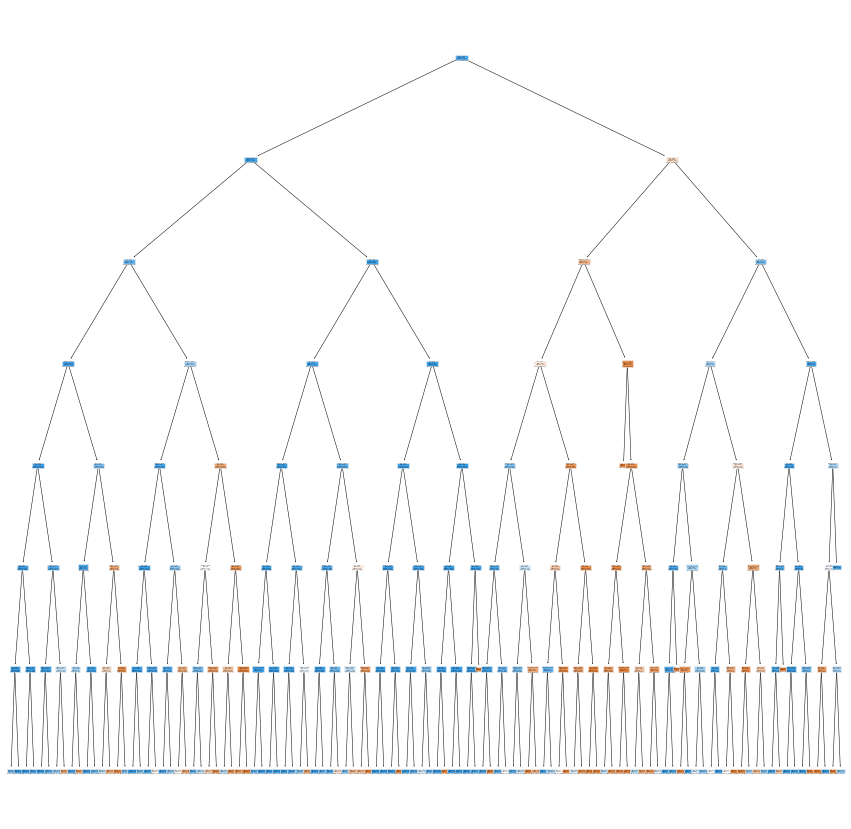

In [27]:
# Train max depth tree selected = 7
tree_opt = DecisionTreeClassifier(max_depth=7)
tree_opt = tree_opt.fit(df_DataOrig_Sel2.iloc[:,:-1], df_DataOrig_Sel2.iloc[:,-1])
plt.figure(figsize=(15, 15)) #definiendo el tamaño de la figura
plot_tree(tree_opt, filled=True, feature_names=df_DataOrig_Sel2.columns[:-1])
plt.show() #mostrando el árbol

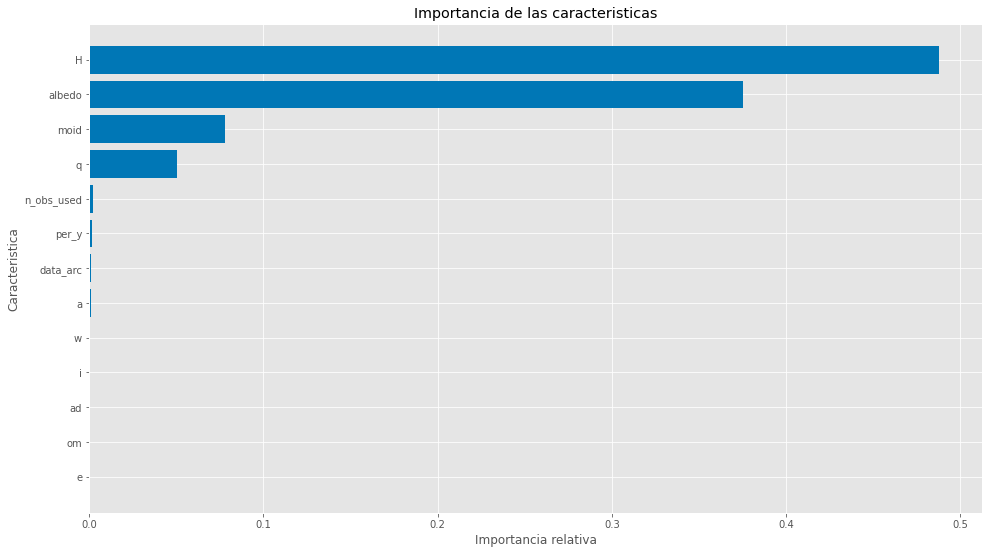

importancia de las variables:
 [9.05188596e-04 1.96040483e-05 6.07093597e-04 2.93489662e-04
 7.25957439e-04 5.05732335e-02 4.06520009e-04 1.49490059e-03
 1.07785195e-03 2.38042535e-03 4.88034074e-01 3.75435949e-01
 7.80457127e-02]


In [31]:
# Plot tree features
features = df_DataOrig_Sel2.columns
importances = tree_opt.feature_importances_
indices = np.argsort(importances)

plt.title('Importancia de las caracteristicas')
plt.barh(range(len(indices)), importances[indices], color='#0077B6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.ylabel('Caracteristica')
plt.show()
print("importancia de las variables:\n",tree_opt.feature_importances_)

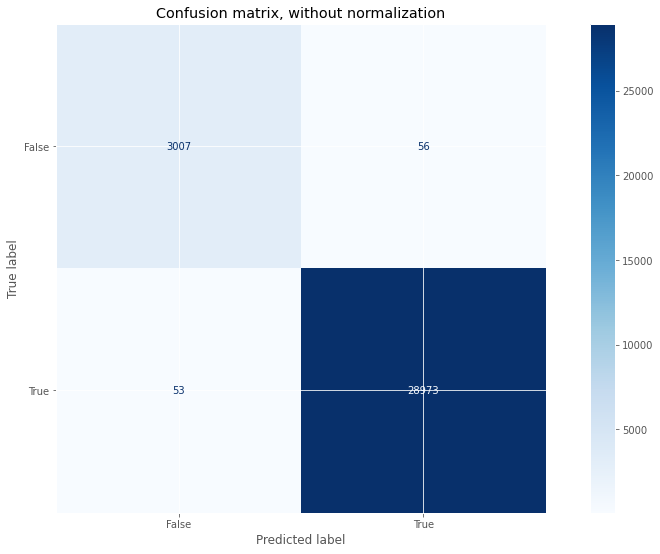

In [29]:
disp = plot_confusion_matrix(tree, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix, without normalization')
plt.show()

#### Evaluar los 37.681 asteroides que la NASA no ha evaluado. Se deberá generar un archivo csv con 37.681 filas, cada fila podrá ser False o True, donde False representa que el asteroide no es peligroso para la tierra.

In [35]:
# Se leen y cargan los datos
df_DataEval = pd.read_csv("tarea2Evaluar.csv", low_memory=False)
df_DataEval

,full_name,a,e,G,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,Irene,2.585567,0.166582,NaN,9.121644,86.122661,97.858991,2.154858,3.016277,4.157593,61450.0,0,2688,6.30,NaN,0.159,15.02800,NaN,0.833,0.388,NaN,S,S,N,N,1.179660
1,Thetis,2.470354,0.133032,NaN,5.591205,125.552944,136.208252,2.141719,2.798989,3.882818,61117.0,0,3650,7.76,NaN,0.193,12.27048,NaN,0.829,0.438,NaN,Sl,S,N,N,1.129810
2,Melpomene,2.296654,0.217674,0.25,10.128731,150.383862,227.950847,1.796731,2.796576,3.480578,60906.0,0,5082,6.51,NaN,0.181,11.57000,NaN,0.854,0.425,NaN,S,S,N,N,0.813258
3,Kalliope,2.914849,0.097677,0.21,13.715312,66.052770,356.082082,2.630136,3.199562,4.976595,60393.0,0,2923,6.45,NaN,0.166,4.14830,0.491,0.715,0.234,NaN,X,M,N,N,1.643210
4,Phocaea,2.400161,0.254614,NaN,21.604840,214.130609,90.263215,1.789046,3.011275,3.718507,58150.0,0,3132,7.83,NaN,0.350,9.93410,NaN,0.932,0.513,NaN,S,S,N,N,0.923495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37676,(2016 LK47),3.195944,0.232949,NaN,26.521186,121.439969,72.849032,2.451453,3.940435,5.713562,2278.0,2,74,16.50,NaN,0.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.590970
37677,(2016 LL49),3.194157,0.587350,NaN,6.487226,232.633423,68.109831,1.318068,5.070245,5.708770,2229.0,1,89,19.80,NaN,0.043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.324697
37678,(2016 NV4),3.155975,0.430349,NaN,28.718353,115.532995,136.849398,1.797805,4.514145,5.606716,2250.0,2,47,18.20,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.854315
37679,(2016 NB7),3.171225,0.159119,NaN,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,1,50,16.20,NaN,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.663010


In [38]:
# Se eliminan columnas segun lo definido en punto 1
df_DataEval_Sel = df_DataEval.drop(["full_name", "G", "extent", "GM", "IR", "rot_per", "BV", "UB", "spec_B", "spec_T", "pha", "neo", "condition_code"], axis="columns", inplace=False)

In [39]:
# Por otro lado, se rellenan valores nulos con su mediana respectiva.
df_DataEval_Sel = df_DataEval_Sel.fillna(df_DataEval_Sel.median())

# Se valida no presencia de valores nulos
df_DataEval_Sel.isna().sum()

a             0
e             0
i             0
om            0
w             0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
H             0
albedo        0
moid          0
dtype: int64

In [40]:
# Se selecciona el modelo de Arbol de Desición con Max_Depth = 7, lo que arroja un F1-Score de 0.98 aprox segun lo
# mostrado anteriormente

modelo_final = tree_opt

# Se realiza la predicción de "Danger"
new_val_predict = pd.DataFrame(tree_opt.predict(df_DataEval_Sel))

print("Resumen de predicciones:")
print(new_val_predict.value_counts())

# Se agrega nueva columna "Danger" a DataFrame Original evaluado
df_DataEval_Final = df_DataEval
df_DataEval_Final["Danger_Predict"] = new_val_predict

# Se exporta archivo CSV
df_DataEval_Final.to_csv("DataEval_Predicciones.csv")

Resumen de predicciones:
True     34248
False     3433
dtype: int64


#### Result 

In [41]:
df_final = pd.read_csv("DataEval_Predicciones.csv", low_memory=False)

In [45]:
# Revisando archivo csv creado y la columna Danger_Predict que indica si es peligroso o no el asteroide en base al árbol de decisión
df_final.info()
df_final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37681 entries, 0 to 37680
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      37681 non-null  int64  
 1   full_name       37681 non-null  object 
 2   a               37681 non-null  float64
 3   e               37681 non-null  float64
 4   G               36 non-null     float64
 5   i               37681 non-null  float64
 6   om              37681 non-null  float64
 7   w               37681 non-null  float64
 8   q               37681 non-null  float64
 9   ad              37681 non-null  float64
 10  per_y           37681 non-null  float64
 11  data_arc        37639 non-null  float64
 12  condition_code  37681 non-null  int64  
 13  n_obs_used      37681 non-null  int64  
 14  H               37480 non-null  float64
 15  extent          5 non-null      object 
 16  albedo          37343 non-null  float64
 17  rot_per         3086 non-null  

,Unnamed: 0,full_name,a,e,G,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid,Danger_Predict
0,0,Irene,2.585567,0.166582,NaN,9.121644,86.122661,97.858991,2.154858,3.016277,4.157593,61450.0,0,2688,6.30,NaN,0.159,15.02800,NaN,0.833,0.388,NaN,S,S,N,N,1.179660,True
1,1,Thetis,2.470354,0.133032,NaN,5.591205,125.552944,136.208252,2.141719,2.798989,3.882818,61117.0,0,3650,7.76,NaN,0.193,12.27048,NaN,0.829,0.438,NaN,Sl,S,N,N,1.129810,True
2,2,Melpomene,2.296654,0.217674,0.25,10.128731,150.383862,227.950847,1.796731,2.796576,3.480578,60906.0,0,5082,6.51,NaN,0.181,11.57000,NaN,0.854,0.425,NaN,S,S,N,N,0.813258,True
3,3,Kalliope,2.914849,0.097677,0.21,13.715312,66.052770,356.082082,2.630136,3.199562,4.976595,60393.0,0,2923,6.45,NaN,0.166,4.14830,0.491,0.715,0.234,NaN,X,M,N,N,1.643210,True
4,4,Phocaea,2.400161,0.254614,NaN,21.604840,214.130609,90.263215,1.789046,3.011275,3.718507,58150.0,0,3132,7.83,NaN,0.350,9.93410,NaN,0.932,0.513,NaN,S,S,N,N,0.923495,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37676,37676,(2016 LK47),3.195944,0.232949,NaN,26.521186,121.439969,72.849032,2.451453,3.940435,5.713562,2278.0,2,74,16.50,NaN,0.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.590970,True
37677,37677,(2016 LL49),3.194157,0.587350,NaN,6.487226,232.633423,68.109831,1.318068,5.070245,5.708770,2229.0,1,89,19.80,NaN,0.043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.324697,False
37678,37678,(2016 NV4),3.155975,0.430349,NaN,28.718353,115.532995,136.849398,1.797805,4.514145,5.606716,2250.0,2,47,18.20,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.854315,True
37679,37679,(2016 NB7),3.171225,0.159119,NaN,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,1,50,16.20,NaN,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.663010,True
